In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns #For getting the heatmap

In [64]:
df = pd.read_csv("breast_cancer.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

# Data Analysis and Pre-Processing

In [65]:
df.groupby('diagnosis').count()


id  radius_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis                                                              
B          357          357           357             357        357   
M          212          212           212             212        212   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
B                      357               357             357   
M                      212               212             212   

           concave points_mean  symmetry_mean  ...  texture_worst  \
diagnosis                                      ...                  
B                          357            357  ...            357   
M                          212            212  ...            212   

           perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
diagnosis                                                                     
B                      357         357               357                357   
M                      212         212               212                212   

           concavity_worst  concave points_worst  symmetry_worst  \
diagnosis                                                          
B                      357                   357             357   
M                      212                   212             212   

           fractal_dimension_worst  Unnamed: 32  
diagnosis                                        
B                              357            0  
M                              212            0  

[2 rows x 32 columns]

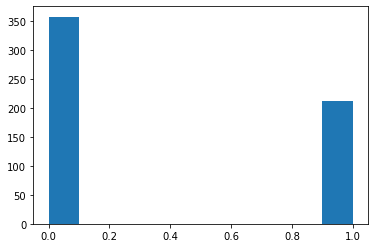

In [66]:
df = df.drop(df[['Unnamed: 32', 'id']],axis =1) #dropping the unnamed bad column
df[['diagnosis']] = df[['diagnosis']].replace(['M'], 1).replace(['B'], 0) #replacing Malignant with 1s and Benign with 0s
plt.hist(df['diagnosis'])
plt.show()

In [67]:
# max_threshold=df['radius_worst'].quantile(0.95)
# min_threshold=df['radius_worst'].quantile(0.05)
# # df = df[(df['radius_worst']>min_threshold) & (df['radius_worst']<max_threshold)]

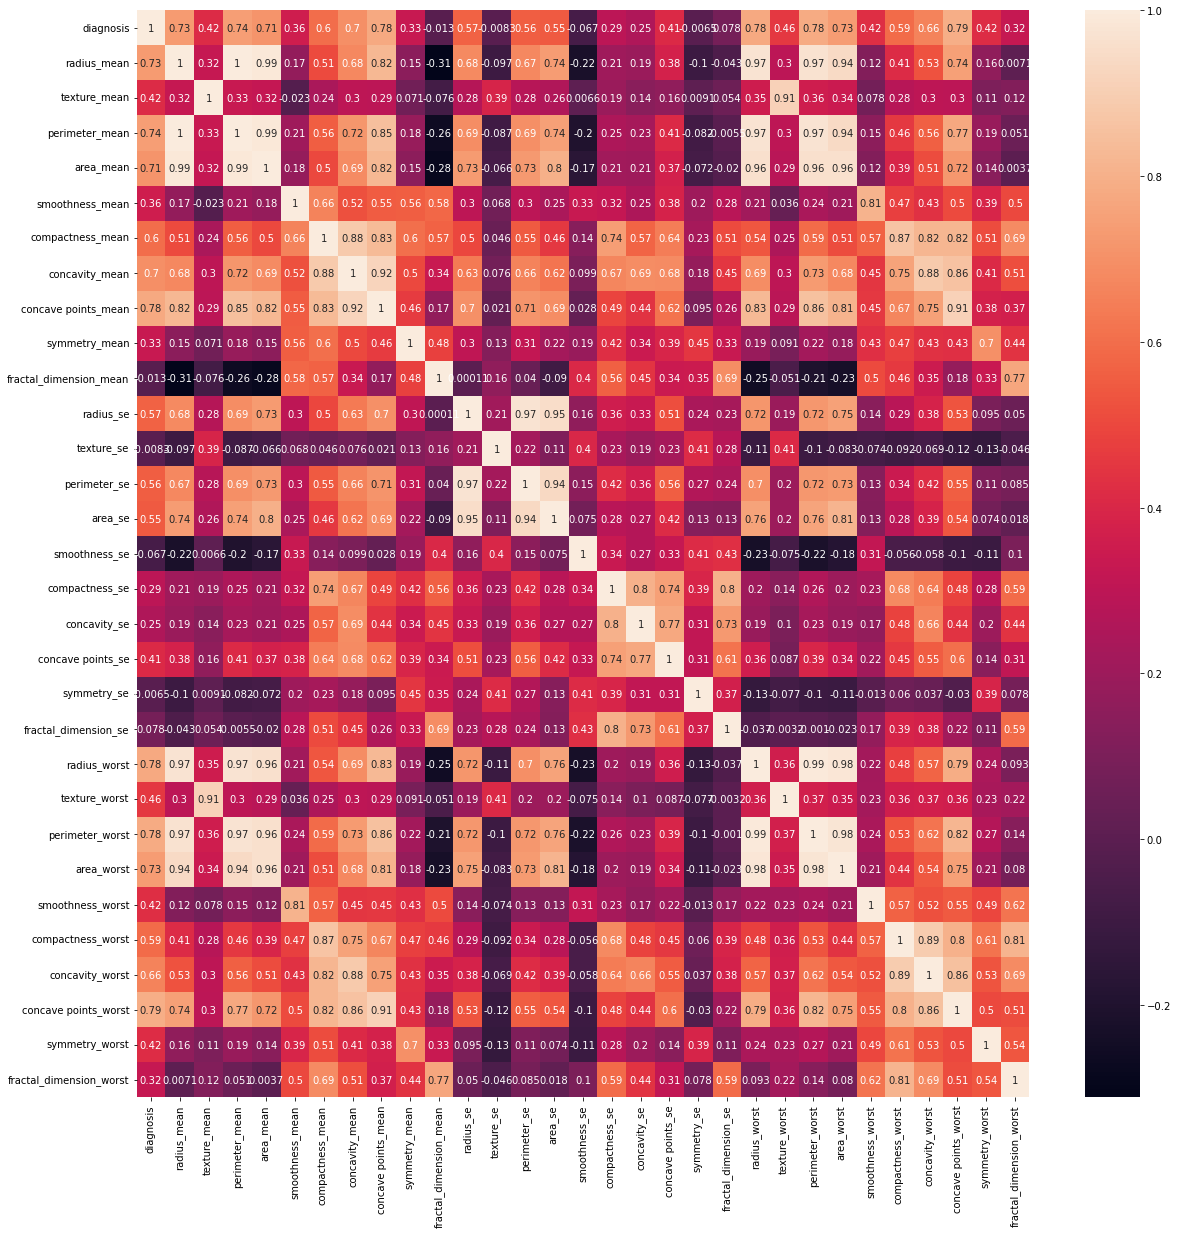

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
Name: diagnosis, dtype: float64

In [68]:
corel_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corel_matrix, annot = True)
plt.show()
corel_matrix.diagnosis.sort_values(ascending= False).head()

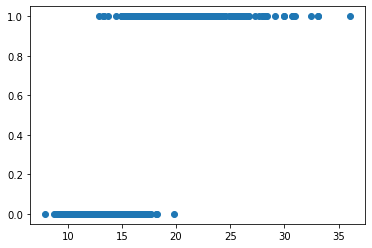

In [69]:
plt.scatter(df['radius_worst'], df['diagnosis'])

# Splitting the Data 

In [70]:
train = df.sample(frac = 0.75, random_state= 200)
test = df.drop(train.index)
train

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
225          0        14.34         13.47           92.51      641.2   
385          1        14.60         23.29           93.97      664.7   
338          0        10.05         17.53           64.41      310.8   
458          0        13.00         25.13           82.61      520.2   
495          0        14.87         20.21           96.12      680.9   
..         ...          ...           ...             ...        ...   
339          1        23.51         24.27          155.10     1747.0   
284          0        12.89         15.70           84.08      516.6   
546          0        10.32         16.35           65.31      324.9   
482          0        13.47         14.06           87.32      546.3   
519          0        12.75         16.70           82.51      493.8   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
225          0.09906           0.07624         0.05724             0.046030   
385          0.08682           0.06636         0.08390             0.052710   
338          0.10070           0.07326         0.02511             0.017750   
458          0.08369           0.05073         0.01206             0.017620   
495          0.09587           0.08345         0.06824             0.049510   
..               ...               ...             ...                  ...   
339          0.10690           0.12830         0.23080             0.141000   
284          0.07818           0.09580         0.11150             0.033900   
546          0.09434           0.04994         0.01012             0.005495   
482          0.10710           0.11550         0.05786             0.052660   
519          0.11250           0.11170         0.03880             0.029950   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
225         0.2075  ...         16.77          16.90           110.40   
385         0.1627  ...         15.79          31.71           102.20   
338         0.1890  ...         11.16          26.84            71.98   
458         0.1667  ...         14.34          31.88            91.06   
495         0.1487  ...         16.01          28.48           103.90   
..             ...  ...           ...            ...              ...   
339         0.1797  ...         30.67          30.73           202.40   
284         0.1432  ...         13.90          19.69            92.12   
546         0.1885  ...         11.25          21.77            71.12   
482         0.1779  ...         14.83          18.32            94.94   
519         0.2120  ...         14.45          21.74            93.63   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
225       873.2           0.12970            0.15250          0.16320   
385       758.2           0.13120            0.15810          0.26750   
338       384.0           0.14020            0.14020          0.10550   
458       628.5           0.12180            0.10930          0.04462   
495       783.6           0.12160            0.13880          0.17000   
..          ...               ...                ...              ...   
339      2906.0           0.15150            0.26780          0.48190   
284       595.6           0.09926            0.23170          0.33440   
546       384.9           0.12850            0.08842          0.04384   
482       660.2           0.13930            0.24990          0.18480   
519       624.1           0.14750            0.19790          0.14230   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
225               0.10870          0.3062                  0.06072  
385               0.13590          0.2477                  0.06836  
338               0.06499          0.2894                  0.07664  
458               0.05921          0.2306                  0.06291  
495               0.10170          0.2369                  0.06599  
..                    .

**Taking concave_points_worst as the input feature for the regression**

In [71]:
def univariate_logistic_regression(x, y, alpha =0.001):
    m = x.shape[0]
    cost_list= []
    w = 0
    b = 0
    change = 1
    cost_prev =1
    pred_list=[]
    while change >1e-6 :
        line = w * x + b
        ypred = 1 / ( 1 + np.exp(-line))
        error = y-ypred
        cost = (1/m) * np.dot(error.T, error)
        
        dw = (-2/m) * np.sum(error * x)
        db = (-2/m) * np.sum(error)
        
        w = w - alpha * dw
        b = b - alpha * db
        
        cost_list.append(cost)
        change = abs(cost_prev - cost)
        cost_prev = cost
    return cost_list, w, b

In [72]:
x = train['radius_worst']
y = train['diagnosis']
y.shape

(427,)

In [73]:
cost_list, w, b = univariate_logistic_regression(x,y)
cost_list[-1]

0.10171757136994984

0.267194702340987
-4.725070588000949


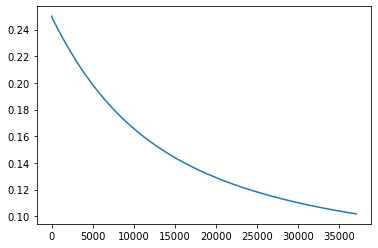

In [74]:
plt.plot(cost_list)
print(w)
print(b)

# Testing the Model with the Test data

In [75]:
def predict(x, w, b) :
    prediction = []
    line = w * x + b
    ypred = 1 / ( 1 + np.exp(-line))
    for predict in ypred:
        if predict >= .40: #bias of 0.6 given to malignant Cancers
            prediction.append(1)
        else :
            prediction.append(0)

    return prediction, line, ypred 

**Test data**

In [76]:
x = test['radius_worst']
y = test['diagnosis']
prediction, line, ypred = predict(x, w, b)

**Calculating the Score using sklearn metrics**

In [77]:
from sklearn.metrics import f1_score
F1_Score = f1_score(y, prediction)
print('F1 Score : ', F1_Score)


F1 Score :  0.905982905982906


# Visualising the result

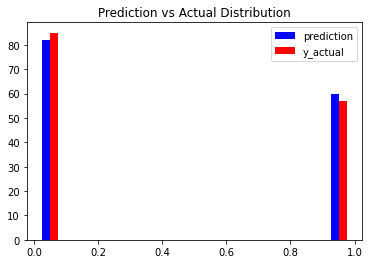

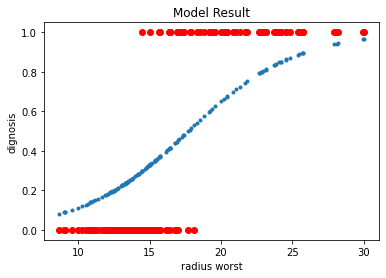

In [78]:
y_and_ypred = [prediction, y]
a = plt.subplot()
labels = ['prediction', 'y_actual']
colors = ['blue','red']
a.hist(y_and_ypred, bins = 10, rwidth=0.5,label=labels, color = colors)
a.legend(prop={'size': 10})
plt.title(label="Prediction vs Actual Distribution")
plt.show()

plt.scatter(x, ypred, marker='.')
plt.scatter(x,y, color = "red")
plt.xlabel('radius worst')
plt.ylabel('dignosis')
plt.title('Model Result')
plt.show()

In [79]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Multivariate 

In [80]:
def multivariate_logistic_regression(x, y, alpha =0.0005):
    m = x.shape[0] # no of rows
    n = x.shape[1] # no of features
    x = np.hstack((np.ones((m,1)), x)) 
    θ = np.zeros(n+1)
    change = 1
    cost_prev =1
    cost_list=[]
    ypred_list = []
    while change >1e-6 :
        lines  = np.dot(x, θ)
        ypred = sigmoid(lines)
        error = ypred - y
        
        cost = -(1/m)* np.sum(y*np.log(ypred) +(1-y)*np.log(1-ypred))
        
        θ = θ - alpha * ((1/m) * np.dot(x.T,error))
               
        cost_list.append(cost)
        ypred_list.append(ypred)

        change = abs(cost_prev - cost)
        cost_prev = cost
        print(cost)
    return cost_list, θ, ypred

In [81]:
x = train[['perimeter_worst', 'concavity_mean']]
y = train.diagnosis
cost_list, θ, ypred_list = multivariate_logistic_regression(x,y)
cost_list[-1]

0.6931471805599453
0.6926089067871722
0.6924364054805885
0.6923789889476231
0.6923563159174999
0.692344418733242
0.6923358183086862
0.6923282346587418
0.6923209633277935
0.6923137882402324
0.6923066428476456
0.692299506700129
0.6922923735056424
0.6922852413295821
0.6922781095768866
0.6922709780645574
0.6922638467363097
0.6922567155748311
0.6922495845747949
0.6922424537345603
0.6922353230536203
0.6922281925318167
0.6922210621690983
0.6922139319654472
0.6922068019208556
0.6921996720353183
0.6921925423088318
0.6921854127413922
0.6921782833329964
0.6921711540836405
0.6921640249933216
0.6921568960620359
0.6921497672897803
0.6921426386765509
0.6921355102223444
0.6921283819271579
0.6921212537909872
0.6921141258138293
0.692106997995681
0.6920998703365383
0.6920927428363981
0.6920856154952569
0.6920784883131114
0.692071361289958
0.6920642344257933
0.6920571077206139
0.6920499811744165
0.6920428547871975
0.6920357285589536
0.6920286024896812
0.692021476579377
0.6920143508280373
0.692007225235659

0.35880740038481

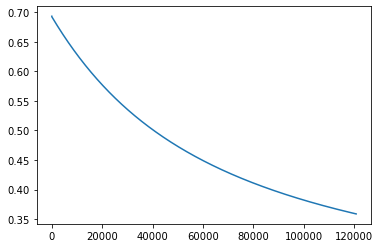

In [82]:
plt.plot(cost_list)

In [83]:
def predict_multi(x,θ) :
    prediction = []
    lines = np.dot(x,θ)
    ypred = 1 / ( 1 + np.exp(-lines))
    for predict in ypred:
        if predict >= .40: #bias of 0.6 given to malignant Cancers
            prediction.append(1)
        else :
            prediction.append(0)

    return prediction, line, ypred 

In [84]:
x = np.hstack((np.ones((x.shape[0],1)), x)) 
prediction , line, ypred = predict_multi(x,θ)

In [85]:
from sklearn.metrics import f1_score
F1_Score = f1_score(y, prediction)
print('F1 Score : ', F1_Score)

F1 Score :  0.8819875776397514


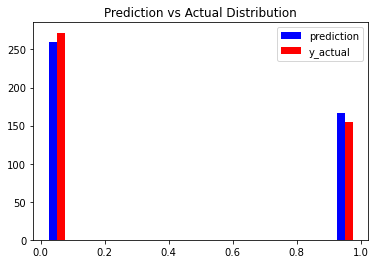

In [86]:
y_and_ypred = [prediction, y]
a = plt.subplot()
labels = ['prediction', 'y_actual']
colors = ['blue','red']
a.hist(y_and_ypred, bins = 10, rwidth=0.5,label=labels, color = colors)
a.legend(prop={'size': 10})
plt.title(label="Prediction vs Actual Distribution")
plt.show()